In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import itertools
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model, datasets
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.datasets.samples_generator import make_blobs
from ipywidgets import interact
from IPython.display import display
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
ls = pd.read_csv('listings.csv')
ls.shape

(58067, 16)

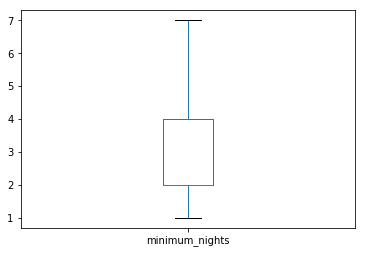

In [3]:
ls.boxplot('minimum_nights', showfliers=False,grid = False)

In [6]:
ls1 = ls[ls['minimum_nights'] <= 7]

In [7]:
ls1.shape

(54884, 16)

In [8]:
ls2 = ls1[ls1['availability_365'] <= 365]

In [9]:
ls2.shape

(54884, 16)

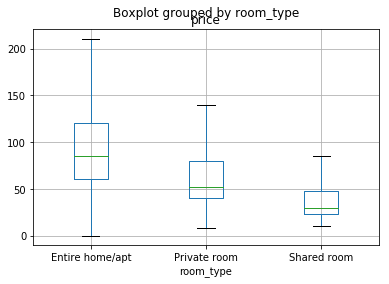

In [10]:
ls2.boxplot(column='price', by='room_type',showfliers=False)

In [11]:
ls2['incomes'] = ls2.price * (365 - ls2.availability_365 )

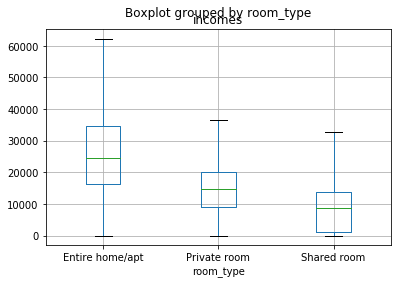

In [12]:
ls2.boxplot(column='incomes', by='room_type',showfliers=False)

In [17]:
ls2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54884 entries, 0 to 58066
Data columns (total 17 columns):
id                                54884 non-null int64
name                              54812 non-null object
host_id                           54884 non-null int64
host_name                         54874 non-null object
neighbourhood_group               0 non-null float64
neighbourhood                     54884 non-null object
latitude                          54884 non-null float64
longitude                         54884 non-null float64
room_type                         54884 non-null object
price                             54884 non-null int64
minimum_nights                    54884 non-null int64
number_of_reviews                 54884 non-null int64
last_review                       43847 non-null object
reviews_per_month                 43847 non-null float64
calculated_host_listings_count    54884 non-null int64
availability_365                  54884 non-null int64
in

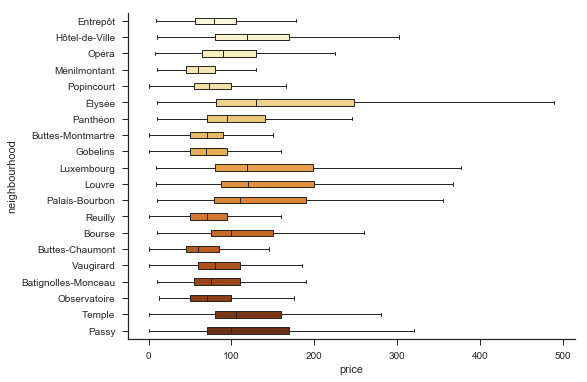

In [36]:
sns.set(style="ticks")
f, ax = plt.subplots(figsize=(8, 6))
sns.despine(left= False)
sns.boxplot(x= 'price' , y="neighbourhood", data=ls2, width=0.4,linewidth=1, palette = 'YlOrBr',showfliers = False )

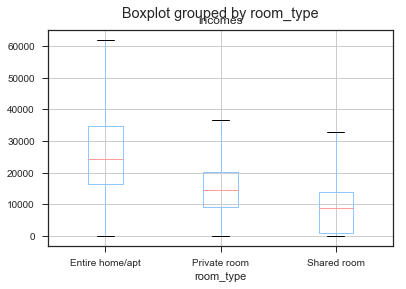

In [36]:
ls2.boxplot(column='incomes', by='room_type',showfliers=False)

In [58]:
ls2_eh.incomes.describe()

count    4.727900e+04
mean     2.919892e+04
std      3.751609e+04
min      0.000000e+00
25%      1.642500e+04
50%      2.436000e+04
75%      3.467500e+04
max      3.423335e+06
Name: incomes, dtype: float64

In [59]:
ls2_eh_abnormal = ls2_eh[ls2_eh['incomes'] >= 3.423335e+06]
ls2_eh_abnormal

,index,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,incomes
0,13860,7225849,"Artistic apartment, Montmartre",34063120,Martin,NaN,Buttes-Montmartre,48.890107,2.346739,Entire home/apt,9379,2,23,2016-07-07,0.55,1,0,3423335


In [42]:
ls2_pr.incomes.describe()

count    7.127000e+03
mean     1.843272e+04
std      4.381362e+04
min      0.000000e+00
25%      9.125000e+03
50%      1.460000e+04
75%      2.007500e+04
max      2.000000e+06
Name: incomes, dtype: float64

In [43]:
ls2_pr_abnormal = ls2_pr[ls2_pr['incomes'] >= 2.000000e+06]
ls2_pr_abnormal

,index,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,incomes
0,43947,24441436,Audacity & Chic in Paris 9th - Chambre Uno,184585722,Sandra,NaN,Élysée,48.881508,2.326565,Private room,25000,1,0,NaN,NaN,3,285,2000000


In [70]:
ls2_sr.incomes.describe()

count    4.780000e+02
mean     1.463955e+04
std      7.662683e+04
min      0.000000e+00
25%      1.085000e+03
50%      8.760000e+03
75%      1.387000e+04
max      1.490000e+06
Name: incomes, dtype: float64

In [47]:
ls2_sr_abnormal = ls2_sr[ls2_sr['incomes'] >= 1.490000e+06]
ls2_sr_abnormal

,index,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,incomes
0,35906,19978529,"Logement pas disponible, je ne le\nLoue plus",22915015,Sacha,NaN,Batignolles-Monceau,48.879847,2.298583,Shared room,5000,1,13,2017-12-13,0.71,1,67,1490000


In [49]:
ls2_eh = ls2[ls2["room_type"]=="Entire home/apt"].sort_values(by=['incomes'], ascending=False).reset_index()
#ls2_eh['rank'] = ls2_eh.index
ls2_pr = ls2[ls2["room_type"]=="Private room"].sort_values(by=['incomes'], ascending=False).reset_index()
#ls2_pr['rank'] = ls2_pr.index
ls2_sr = ls2[ls2["room_type"]=="Shared room"].sort_values(by=['incomes'], ascending=False).reset_index()
#ls2_sr['rank'] = ls2_sr.index
n_rooms = 10
ls3 = pd.concat([ls2_eh.head(n_rooms),ls2_pr.head(n_rooms),ls2_sr.head(n_rooms)]).reset_index()
ls3.head(2)

,level_0,index,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,incomes
0,0,13860,7225849,"Artistic apartment, Montmartre",34063120,Martin,NaN,Buttes-Montmartre,48.890107,2.346739,Entire home/apt,9379,2,23,2016-07-07,0.55,1,0,3423335
1,1,10808,6088687,Lovely Duplex 30m2 - Le Marais,2071795,Mathilde,NaN,Temple,48.865385,2.353980,Entire home/apt,8500,3,38,2018-03-29,0.83,1,0,3102500


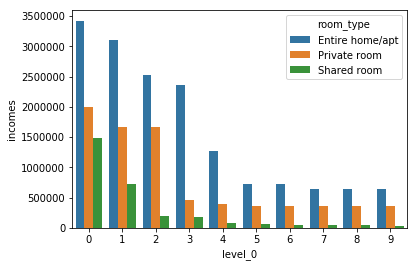

In [30]:
sns.barplot(x = 'level_0', y = 'incomes', hue = 'room_type', data = ls3)

In [52]:
pd.options.display.max_columns = 1000

In [53]:
lst_full = pd.read_csv('listings_full.csv')
lst_full.head(2)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2577,https://www.airbnb.com/rooms/2577,20190205040859,2019-02-05,Loft for 4 by Canal Saint Martin,"100 m2 loft (1100 sq feet) with high ceiling, ...",The district has any service or shop you may d...,"100 m2 loft (1100 sq feet) with high ceiling, ...",none,NaN,NaN,"Metro lines : 4, 8, 3, 11, 9.",NaN,NaN,NaN,NaN,NaN,https://a0.muscache.com/im/pictures/09da057c-0...,NaN,2827,https://www.airbnb.com/users/show/2827,Karine,2008-09-09,"Casablanca, Grand Casablanca, Morocco","Arrivée à Casablanca il y a 4 ans, je suis amo...",within a few hours,80%,NaN,f,https://a0.muscache.com/im/pictures/17fe6c88-a...,https://a0.muscache.com/im/pictures/17fe6c88-a...,République,2.0,2.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Paris, Île-de-France, France",République,Entrepôt,NaN,Paris,Île-de-France,75010,Paris,"Paris, France",FR,France,48.869933,2.362511,t,Loft,Entire home/apt,4,2.0,2.0,2.0,Real Bed,"{TV,Internet,Wifi,Kitchen,Heating,Washer,Dryer...",NaN,$125.00,NaN,NaN,$0.00,$40.00,1,$0.00,3,1125,3,3,1125,1125,3.0,1125.0,3 months ago,t,0,0,0,85,2019-02-05,1,1,2019-01-02,2019-01-02,100.0,10.0,10.0,10.0,10.0,10.0,10.0,t,NaN,{PARIS},t,f,strict_14_with_grace_period,f,f,1,1,0,0,0.86
1,5396,https://www.airbnb.com/rooms/5396,20190205040859,2019-02-05,Explore the heart of old Paris,"Cozy, well-appointed and graciously designed s...","Small, well appointed studio apartment at the ...","Cozy, well-appointed and graciously designed s...",none,"You are within walking distance to the Louvre,...",The staircase leading up to the apartment is n...,The flat is close to two or three major metro ...,"The flat includes its own modern bathroom, a w...",We expect guests to operate rather independent...,This is a small flat in a very old building th...,NaN,NaN,https://a0.muscache.com/im/pictures/52413/f9bf...,NaN,7903,https://www.airbnb.com/users/show/7903,Borzou,2009-02-14,"Istanbul, İstanbul, Turkey",We are both journalists based in the Middle Ea...,NaN,NaN,NaN,f,https://a0.muscache.com/im/users/7903/profile_...,https://a0.muscache.com/im/users/7903/profile_...,Saint-Paul - Ile Saint-Louis,1.0,1.0,"['email', 'phone', 'facebook', 'google', 'revi...",t,t,"Paris, Ile-de-France, France",Saint-Paul - Ile Saint-Louis,Hôtel-de-Ville,NaN,Paris,Ile-de-Fran

In [64]:
lst_full[lst_full.id == 19978529 ]

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
35906,19978529,https://www.airbnb.com/rooms/19978529,20190205040859,2019-02-05,"Logement pas disponible, je ne le Loue plus",Logement proche arc de triomphe. Quartier calm...,NaN,Logement proche arc de triomphe. Quartier calm...,none,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://a0.muscache.com/im/pictures/a7bf5dc1-f...,NaN,22915015,https://www.airbnb.com/users/show/22915015,Sacha,2014-10-24,"Madrid, Community of Madrid, Spain",NaN,NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/user/ee17b...,https://a0.muscache.com/im/pictures/user/ee17b...,NaN,1.0,1.0,"['email', 'phone', 'reviews', 'offline_governm...",t,f,"Paris, Île-de-France, France",Ternes,Batignolles-Monceau,NaN,Paris,Île-de-France,75017,Paris,"Paris, France",FR,France,48.879847,2.298583,f,Nature lodge,Shared room,1,0.0,1.0,1.0,Pull-out Sofa,"{TV,Kitchen,""Pets allowed""}",NaN,"$5,000.00",NaN,NaN,NaN,NaN,1,$0.00,1,1125,1,4,1125,1125,1.9,1125.0,9 months ago,t,7,37,67,67,2019-02-05,13,0,2017-08-05,2017-12-13,78.0,7.0,6.0,8.0,8.0,9.0,8.0,t,NaN,{PARIS},t,f,strict_14_with_grace_period,f,f,1,0,0,1,0.71


In [65]:
lst_full[lst_full.id ==7225849]

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
13860,7225849,https://www.airbnb.com/rooms/7225849,20190205040859,2019-02-05,"Artistic apartment, Montmartre",2 bedrooms on different floors in this Duplex....,English: Lots of art in various form will be s...,2 bedrooms on different floors in this Duplex....,none,NaN,NaN,Two minutes away by foot from the Mairie du XV...,"English: If you need any help, I'll be there a...",NaN,Respect the neighbors and keep an appropriate ...,NaN,NaN,https://a0.muscache.com/im/pictures/99038027/f...,NaN,34063120,https://www.airbnb.com/users/show/34063120,Martin,2015-05-23,"Paris, Île-de-France, France",Hello! \r\n\r\nMy favorite travel destination ...,NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/2fed50f5-f...,https://a0.muscache.com/im/pictures/2fed50f5-f...,Montmartre,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Paris, Île-de-France, France",Montmartre,Buttes-Montmartre,NaN,Paris,Île-de-France,75018,Paris,"Paris, France",FR,France,48.890107,2.346739,t,Apartment,Entire home/apt,8,2.0,2.0,5.0,Real Bed,"{TV,Internet,Wifi,Kitchen,""Indoor fireplace"",""...",NaN,"$9,379.00",$970.00,NaN,NaN,$40.00,3,$20.00,2,1125,2,2,1125,1125,2.0,1125.0,22 months ago,t,0,0,0,0,2019-02-05,23,0,2015-08-28,2016-07-07,97.0,10.0,10.0,10.0,10.0,9.0,10.0,t,NaN,{PARIS},f,f,moderate,f,f,1,1,0,0,0.55


In [71]:
cld = pd.read_csv('calendar.csv')

In [81]:
cld.shape

(21195164, 7)

In [82]:
cld.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,2577,2019-02-05,f,$125.00,$125.00,3.0,1125.0
1,2577,2019-02-06,f,$125.00,$125.00,3.0,1125.0
2,2577,2019-02-07,f,$125.00,$125.00,3.0,1125.0
3,2577,2019-02-08,f,$125.00,$125.00,3.0,1125.0
4,2577,2019-02-09,f,$125.00,$125.00,3.0,1125.0


In [69]:
cld1 = cld[cld['minimum_nights']<= 7]

NameError: name 'cld' is not defined

In [84]:
cld1.shape

(19990124, 7)

In [68]:
cld1.dtypes

NameError: name 'cld1' is not defined

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2577,https://www.airbnb.com/rooms/2577,20190205040859,2019-02-05,Loft for 4 by Canal Saint Martin,"100 m2 loft (1100 sq feet) with high ceiling, ...",The district has any service or shop you may d...,"100 m2 loft (1100 sq feet) with high ceiling, ...",none,NaN,...,t,f,strict_14_with_grace_period,f,f,1,1,0,0,0.86
1,5396,https://www.airbnb.com/rooms/5396,20190205040859,2019-02-05,Explore the heart of old Paris,"Cozy, well-appointed and graciously designed s...","Small, well appointed studio apartment at the ...","Cozy, well-appointed and graciously designed s...",none,"You are within walking distance to the Louvre,...",...,t,f,strict_14_with_grace_period,f,f,1,1,0,0,1.33
2,7397,https://www.airbnb.com/rooms/7397,20190205040859,2019-02-05,MARAIS - 2ROOMS APT - 2/4 PEOPLE,"VERY CONVENIENT, WITH THE BEST LOCATION !",PLEASE ASK ME BEFORE TO MAKE A REQUEST !!! No ...,"VERY CONVENIENT, WITH THE BEST LOCATION ! PLEA...",none,NaN,...,f,f,moderate,f,f,1,1,0,0,2.47
3,7964,https://www.airbnb.com/rooms/7964,20190205040859,2019-02-05,Large & sunny flat with balcony !,Very large & nice apartment all for you! - Su...,hello ! We have a great 75 square meter apartm...,Very large & nice apartment all for you! - Su...,none,NaN,...,f,f,strict_14_with_grace_period,f,f,1,1,0,0,0.06
4,8522,https://www.airbnb.com/rooms/8522,20190205040859,2019-02-05,GREAT FLAT w/ CITY VIEW,NaN,Really nice flat located in the 20th district ...,Really nice flat located in the 20th district ...,none,NaN,...,f,f,moderate,f,f,1,1,0,0,0.01


In [12]:
neighbor = pd.read_csv('neighbourhoods.csv')
neighbor.head()

,neighbourhood_group,neighbourhood
0,NaN,Batignolles-Monceau
1,NaN,Bourse
2,NaN,Buttes-Chaumont
3,NaN,Buttes-Montmartre
4,NaN,Élysée


In [14]:
reviews = pd.read_csv('reviews.csv')
reviews.head()

,listing_id,date
0,2577,2019-01-02
1,5396,2009-06-30
2,5396,2009-07-03
3,5396,2009-07-08
4,5396,2009-09-10
